In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Regressão linear simples

In [124]:
!pip install plotly --upgrade

In [125]:
base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [126]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [127]:
Y_plano_saude = base_plano_saude.iloc[:, 1].values
Y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [128]:
np.corrcoef(X_plano_saude, Y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [129]:
X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude.shape

(10, 1)

In [130]:
from sklearn.linear_model import LinearRegression

regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, Y_plano_saude)

LinearRegression()

In [131]:
#b0

regressor_plano_saude.intercept_

-558.9490909090912

In [132]:
#b1

regressor_plano_saude.coef_

array([61.86787879])

In [133]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [134]:
grafico = px.scatter(x = X_plano_saude.ravel(), y= Y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [135]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [136]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [137]:
regressor_plano_saude.score(X_plano_saude, Y_plano_saude)

0.8666112727879174

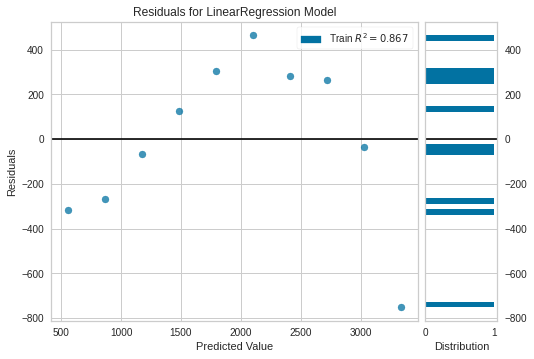

In [138]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, Y_plano_saude)
visualizador.poof()

# Base preço das casas

In [139]:
base_casas = pd.read_csv("house_prices.csv")
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [140]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [141]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [142]:
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


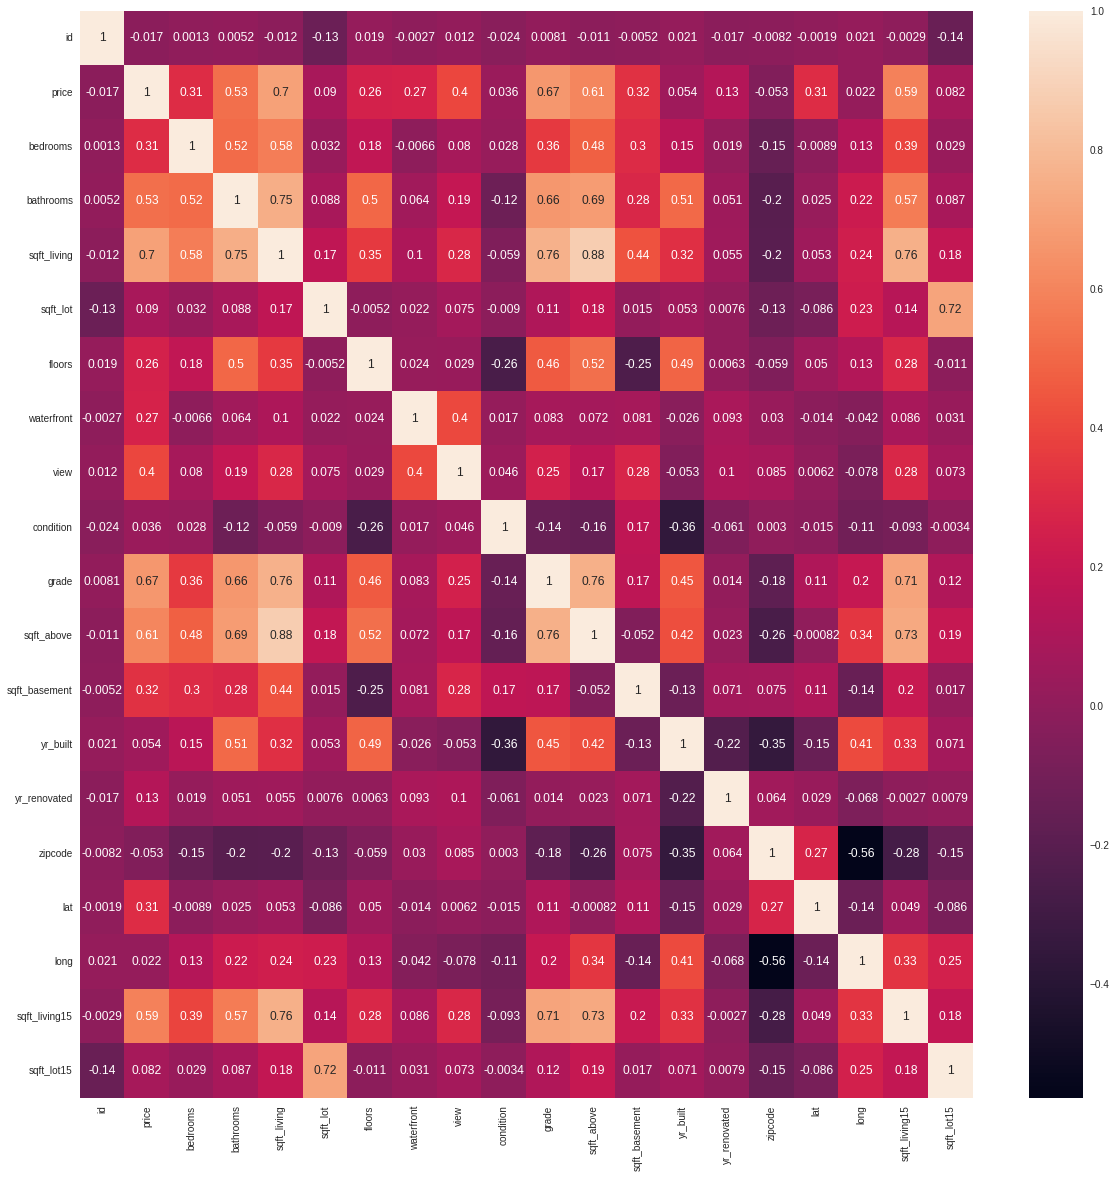

In [143]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True);

In [144]:
X_casas = base_casas.iloc[:,5:6].values
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [145]:
Y_casas = base_casas.iloc[:,2].values
Y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [146]:
from sklearn.model_selection import train_test_split

X_casas_treinamento, X_casas_teste, Y_casas_treinamento, Y_casas_teste = train_test_split(X_casas, Y_casas, test_size = 0.3, random_state=0)

In [147]:
X_casas_treinamento.shape, Y_casas_treinamento.shape

((15129, 1), (15129,))

In [148]:
from sklearn.linear_model import LinearRegression


regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, Y_casas_treinamento) 

LinearRegression()

In [149]:
regressor_simples_casas.intercept_

-37893.59850106726

In [150]:
regressor_simples_casas.coef_

array([278.32860644])

In [151]:
regressor_simples_casas.score(X_casas_treinamento, Y_casas_treinamento)

0.49453356717789776

In [152]:
regressor_simples_casas.score(X_casas_teste, Y_casas_teste)

0.48889929019453027

In [153]:
previsoes =  regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [154]:
grafico = px.scatter(x = X_casas_treinamento.ravel(), y = previsoes)
grafico.show()

In [155]:
grafico1 = px.scatter(x = X_casas_treinamento.ravel(), y = Y_casas_treinamento)
grafico2 = px.line(x = X_casas_treinamento.ravel(), y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

In [156]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [157]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [158]:
abs(Y_casas_teste - previsoes_teste).mean()

172604.1288999542

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [160]:
mean_absolute_error(Y_casas_teste, previsoes_teste)

172604.1288999542

In [161]:
mean_squared_error(Y_casas_teste, previsoes_teste)

70170013932.1159

In [162]:
np.sqrt(mean_squared_error(Y_casas_teste, previsoes_teste))

264896.23238565685

In [163]:
grafico1 = px.scatter(x = X_casas_teste.ravel(), y = Y_casas_teste)
grafico2 = px.line(x = X_casas_teste.ravel(), y = previsoes_teste)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

# Regressão linear múltipla

In [164]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [165]:
X_casas = base_casas.iloc[:,3:19].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [166]:
Y_casas= base_casas.iloc[:,2].values
Y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [167]:
from sklearn.model_selection import train_test_split

X_casas_treinamento, X_casas_teste, Y_casas_treinamento, Y_casas_teste = train_test_split(X_casas, Y_casas, test_size = 0.3, random_state=0)

In [168]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, Y_casas_treinamento)

LinearRegression()

In [169]:
regressor_multiplo_casas.intercept_

5736222.7033961015

In [170]:
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604119e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [171]:
regressor_multiplo_casas.score(X_casas_treinamento, Y_casas_treinamento)

0.7029888085955007

In [172]:
regressor_multiplo_casas.score(X_casas_teste, Y_casas_teste)

0.6885414149062775

In [173]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([ 383751.77768704, 1514216.1751743 ,  546921.96179117, ...,
        314968.57623301,  219405.55573561,  148128.83467045])

In [174]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [175]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(Y_casas_teste, previsoes)

123888.44377485772

# Regressão linear polinomial

In [176]:
base_plano_saude2 = pd.read_csv('plano_saude2.csv')
base_plano_saude2


,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [177]:
X_plano_saude2 = base_plano_saude2.iloc[:, 0:1].values
Y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

In [178]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [179]:
Y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [180]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

In [181]:
X_plano_saude2_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [182]:
regressor_saude_polinormial = LinearRegression()
regressor_saude_polinormial.fit(X_plano_saude2_poly, Y_plano_saude2)

LinearRegression()

In [183]:
regressor_saude_polinormial.intercept_

16561.97463791195

In [184]:
regressor_saude_polinormial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [185]:
novo_registro =[[40]]

In [186]:
novo_registro = poly.transform(novo_registro)
novo_registro

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

In [187]:
regressor_saude_polinormial.predict(novo_registro)

array([1335.33958015])

In [188]:
previsoes = regressor_saude_polinormial.predict(X_plano_saude2_poly)
previsoes

array([ 549.65035464,  345.85081575,  616.53845992,  975.8391595 ,
       1249.06759853, 1472.7272727 , 1894.51048941, 2973.2983677 ,
       5379.16083828, 9993.35664357])

In [189]:
Y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [190]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = Y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [191]:
regressor_saude_polinormial.score(X_plano_saude2_poly, Y_plano_saude2)

0.9976494147321991

# Base preço das casas

In [192]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [193]:
X_casas_treinamento.shape

(15129, 16)

In [194]:
X_casas_teste.shape

(6484, 16)

In [195]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_casas_treinamento_poly = poly.fit_transform(X_casas_treinamento)
X_casas_teste_poly = poly.fit_transform(X_casas_teste)

In [196]:
X_casas_treinamento_poly.shape

(15129, 153)

In [197]:
X_casas_teste_poly.shape

(6484, 153)

In [198]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(X_casas_treinamento_poly, Y_casas_treinamento)

LinearRegression()

In [199]:
regressor_casas_poly.score(X_casas_treinamento_poly, Y_casas_treinamento)

0.817937209116416

In [200]:
regressor_casas_poly.score(X_casas_teste_poly, Y_casas_teste)

0.8153249436575213

In [201]:
previsoes = regressor_casas_poly.predict(X_casas_teste_poly)
previsoes

array([ 386279.00622559, 1991142.84359741,  579098.07328033, ...,
        432859.80838776,  234193.23797607,  123839.61456299])

In [202]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [203]:
mean_absolute_error(Y_casas_teste, previsoes)

101225.53413948139

In [204]:
grafico = px.scatter(x = X_casas_teste[:,2], y = previsoes)
grafico.show()

In [205]:
grafico1 = px.scatter(x = X_casas_teste[:,2], y = Y_casas_teste)
grafico2 = px.line(x = X_casas_teste[:,2], y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

# Regressão com árvores de decisão

In [206]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [207]:
Y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [208]:
from sklearn.tree import DecisionTreeRegressor

regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(X_plano_saude2, Y_plano_saude2)

DecisionTreeRegressor()

In [209]:
previsoes = regressor_arvore_saude.predict(X_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [210]:
Y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [211]:
regressor_arvore_saude.score(X_plano_saude2, Y_plano_saude2)

1.0

In [212]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = Y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [213]:
X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1)

In [214]:
X_teste_arvore = X_teste_arvore.reshape(-1,1)

In [215]:
previsoes = regressor_arvore_saude.predict(X_teste_arvore)
previsoes

array([  470.,   470.,   470.,   470.,   470.,   470.,   470.,   470.,
         470.,   470.,   470.,   470.,   470.,   470.,   470.,   470.,
         470.,   470.,   470.,   470.,   470.,   470.,   470.,   470.,
         470.,   470.,   520.,   520.,   520.,   520.,   520.,   520.,
         520.,   520.,   520.,   520.,   520.,   520.,   520.,   520.,
         520.,   520.,   520.,   520.,   520.,   520.,   520.,   520.,
         520.,   520.,   520.,   520.,   520.,   520.,   520.,   520.,
         520.,   520.,   520.,   520.,   520.,   520.,   520.,   520.,
         520.,   520.,   520.,   520.,   520.,   520.,   520.,   520.,
         520.,   520.,   520.,   520.,   630.,   630.,   630.,   630.,
         630.,   630.,   630.,   630.,   630.,   630.,   630.,   630.,
         630.,   630.,   630.,   630.,   630.,   630.,   630.,   630.,
         630.,   630.,   630.,   630.,   630.,   630.,   630.,   630.,
         630.,   630.,   630.,   630.,   630.,   630.,   630.,   630.,
      

In [216]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = Y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [217]:
regressor_arvore_saude.predict([[40]])

array([1150.])

# Base preço das casas

In [218]:
X_casas_treinamento.shape

(15129, 16)

In [219]:
Y_casas_treinamento.shape

(15129,)

In [220]:
X_casas_teste.shape

(6484, 16)

In [221]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(X_casas_treinamento, Y_casas_treinamento)

DecisionTreeRegressor()

In [222]:
regressor_arvore_casas.score(X_casas_treinamento, Y_casas_treinamento)

0.9992712177726063

In [223]:
regressor_arvore_casas.score(X_casas_teste, Y_casas_teste)

0.7223922562837573

In [224]:
previsoes = regressor_arvore_casas.predict(X_casas_teste)
previsoes

array([ 288000., 1835000.,  480000., ...,  289000.,  215000.,  219950.])

In [225]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [226]:
mean_absolute_error(Y_casas_teste, previsoes)

100212.11320172733

In [227]:
grafico = px.scatter(x = X_casas_teste[:,2], y = previsoes)
grafico.show()

In [228]:
grafico1 = px.scatter(x = X_casas_teste[:,2], y = Y_casas_teste)
grafico2 = px.line(x = X_casas_teste[:,2], y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

# Regressão random forest

In [229]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [230]:
Y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [231]:
from sklearn.ensemble import RandomForestRegressor

regressor_random_forest_saude = RandomForestRegressor(n_estimators = 10)
regressor_random_forest_saude.fit(X_plano_saude2, Y_plano_saude2)

RandomForestRegressor(n_estimators=10)

In [232]:
regressor_random_forest_saude.score(X_plano_saude2,Y_plano_saude2)

0.8325755053218202

In [233]:
previsoes = regressor_random_forest_saude.predict(X_teste_arvore)
previsoes

array([ 533.,  533.,  533.,  533.,  533.,  533.,  533.,  533.,  533.,
        533.,  533.,  533.,  533.,  533.,  533.,  533.,  533.,  533.,
        533.,  533.,  533.,  533.,  533.,  533.,  533.,  533.,  538.,
        538.,  538.,  538.,  538.,  538.,  538.,  538.,  538.,  538.,
        538.,  538.,  538.,  538.,  538.,  538.,  538.,  538.,  538.,
        538.,  538.,  538.,  538.,  538.,  538.,  570.,  570.,  570.,
        570.,  570.,  570.,  570.,  570.,  570.,  570.,  570.,  570.,
        570.,  570.,  570.,  570.,  570.,  570.,  570.,  570.,  570.,
        570.,  570.,  570.,  570.,  628.,  628.,  628.,  628.,  628.,
        628.,  628.,  628.,  628.,  628.,  628.,  628.,  628.,  628.,
        628.,  628.,  628.,  628.,  628.,  628.,  628.,  628.,  628.,
        628.,  628.,  690.,  690.,  690.,  690.,  690.,  690.,  690.,
        690.,  690.,  690.,  690.,  690.,  690.,  690.,  690.,  690.,
        690.,  690.,  690.,  690.,  690.,  690.,  690.,  690.,  690.,
        790.,  790.,

In [234]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = Y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [235]:
regressor_random_forest_saude.predict([[40]])

array([1162.])

# Base preço das casas

In [236]:
X_casas_treinamento.shape, Y_casas_treinamento.shape

((15129, 16), (15129,))

In [237]:
X_casas_teste.shape, Y_casas_teste.shape

((6484, 16), (6484,))

In [238]:
regressor_random_forest_casas = RandomForestRegressor(n_estimators = 100)
regressor_random_forest_casas.fit(X_casas_treinamento, Y_casas_treinamento)

RandomForestRegressor()

In [239]:
regressor_random_forest_casas.score(X_casas_treinamento, Y_casas_treinamento)

0.9812383087324774

In [240]:
regressor_random_forest_casas.score(X_casas_teste, Y_casas_teste)

0.8826842394468017

In [241]:
previsoes = regressor_random_forest_casas.predict(X_casas_teste)
previsoes

array([ 305695.66, 1699463.07,  541389.52, ...,  384222.5 ,  234837.46,
        199451.87])

In [242]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [243]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_casas_teste, previsoes)

67891.42527018399

In [244]:
grafico1 = px.scatter(x = X_casas_teste[:,2], y = Y_casas_teste)
grafico2 = px.line(x = X_casas_teste[:,2], y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

# Regressão svm


In [245]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [246]:
Y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [256]:
# Kernel linear 
from sklearn.svm import SVR

regressor_svr_saude_linear = SVR(kernel = 'linear')
regressor_svr_saude_linear.fit(X_plano_saude2, Y_plano_saude2)

SVR(kernel='linear')

In [257]:
regressor_svr_saude_linear.score(X_plano_saude2, Y_plano_saude2)

0.294299767185203

In [252]:
previsoes = regressor_svr_saude_linear.predict(X_plano_saude2)
previsoes

array([ 216.14,  520.1 ,  824.06, 1128.02, 1431.98, 1735.94, 2039.9 ,
       2343.86, 2647.82, 2951.78])

In [259]:
mean_absolute_error(Y_plano_saude2, previsoes)

1157.06

In [253]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = Y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [283]:
# Kernel polinomial

regressor_svr_saude_poly = SVR(kernel='poly', degree=6)
regressor_svr_saude_poly.fit(X_plano_saude2, Y_plano_saude2)

SVR(degree=6, kernel='poly')

In [284]:
regressor_svr_saude_poly.score(X_plano_saude2, Y_plano_saude2)

0.9707621394081435

In [285]:
previsoes = regressor_svr_saude_poly.predict(X_plano_saude2)
previsoes

array([  502.58723163,   520.10250502,   571.38616926,   695.74609168,
         959.8751159 ,  1468.39260722,  2376.11412013,  3902.04918804,
        6345.12723527, 10101.65161112])

In [286]:
mean_absolute_error(Y_plano_saude2, previsoes)

288.22319071375966

In [287]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = Y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [296]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_plano_saude2_scaled = scaler_x.fit_transform(X_plano_saude2)

scaler_y = StandardScaler()
Y_plano_saude2_scaled = scaler_y.fit_transform(Y_plano_saude2.reshape(-1,1))

In [297]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [298]:
Y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [299]:
# Kernel rbf

regressor_svr_saude_rbf = SVR(kernel='rbf')
regressor_svr_saude_rbf.fit(X_plano_saude2_scaled, Y_plano_saude2_scaled.ravel())

SVR()

In [300]:
regressor_svr_saude_rbf.score(X_plano_saude2_scaled, Y_plano_saude2_scaled)

0.7561578176049305

In [301]:
previsoes = regressor_svr_saude_rbf.predict(X_plano_saude2_scaled)
previsoes

array([-0.62348071, -0.63291278, -0.57066507, -0.49866508, -0.44637596,
       -0.36326797, -0.13553889,  0.29353246,  0.79122818,  1.09382968])

In [303]:
mean_absolute_error(Y_plano_saude2_scaled, previsoes)

0.22109795372153968

In [304]:
grafico = px.scatter(x = X_plano_saude2_scaled[:,0], y = Y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [307]:
novo = [[40]]

In [308]:
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [315]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo).reshape(1,-1))

array([[1333.85650748]])

# Base casas

In [316]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [317]:
Y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [322]:
from sklearn.preprocessing import StandardScaler

scaler_x_casas = StandardScaler()
X_casas_treinamento_scaled = scaler_x_casas.fit_transform(X_casas_treinamento)

scaler_y_casas = StandardScaler()
Y_casas_treinamento_scaled = scaler_y_casas.fit_transform(Y_casas_treinamento.reshape(-1,1))

In [323]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [324]:
Y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [325]:
X_casas_teste_scaled = scaler_x_casas.transform(X_casas_teste)

Y_casas_teste_scaled = scaler_y_casas.transform(Y_casas_teste.reshape(-1,1))

In [328]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(X_casas_treinamento_scaled , Y_casas_treinamento_scaled.ravel())

SVR()

In [329]:
regressor_svr_casas.score(X_casas_treinamento_scaled, Y_casas_treinamento_scaled)

0.8123337393217414

In [330]:
regressor_svr_casas.score(X_casas_teste_scaled, Y_casas_teste_scaled)

0.7374454724715004

In [331]:
previsoes = regressor_svr_casas.predict(X_casas_teste_scaled)
previsoes

array([-0.54571552,  3.46454238,  0.02286424, ..., -0.46405796,
       -0.91113329, -1.03334346])

In [337]:
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1)).ravel()
previsoes_inverse

array([ 341068.00444201, 1807402.87782896,  548966.93321166, ...,
        370925.76468462,  207454.44648005,  162768.78470705])

In [335]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [338]:
mean_absolute_error(Y_casas_teste, previsoes_inverse)

82453.02198655577

In [339]:
grafico1 = px.scatter(x = X_casas_teste[:,2], y = Y_casas_teste)
grafico2 = px.line(x = X_casas_teste[:,2], y = previsoes_inverse)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

# Regressão redes neurais


In [340]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [341]:
Y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [345]:
from sklearn.neural_network import MLPRegressor

regressor_rna_saude = MLPRegressor(max_iter = 1000)
regressor_rna_saude.fit(X_plano_saude2_scaled, Y_plano_saude2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [346]:
regressor_rna_saude.score(X_plano_saude2_scaled, Y_plano_saude2_scaled)

0.9622097300194417

In [349]:
previsoes = regressor_rna_saude.predict(X_plano_saude2_scaled)
previsoes

array([-0.69692194, -0.69537745, -0.67106339, -0.62790845, -0.55690129,
       -0.40981984, -0.14786381,  0.35141049,  1.27295367,  2.19486165])

In [351]:
grafico = px.scatter(x = X_plano_saude2_scaled[:,0], y = Y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled[:,0], y = previsoes, name = 'Regressão')
grafico.show()

In [352]:
novo = [[40]]

In [354]:
novo = scaler_x.transform(novo)

In [358]:
scaler_y.inverse_transform(regressor_rna_saude.predict(novo).reshape(1,-1))

array([[1086.89323031]])

# Base casas

In [359]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [360]:
Y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [362]:
regressor_rna_casas = MLPRegressor(max_iter = 1000, hidden_layer_sizes=(9,9))
regressor_rna_casas.fit(X_casas_treinamento_scaled, Y_casas_treinamento_scaled.ravel()) 

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [363]:
regressor_rna_casas.score(X_casas_treinamento_scaled, Y_casas_treinamento_scaled)

0.8925668218059711

In [364]:
regressor_rna_casas.score(X_casas_teste_scaled, Y_casas_teste_scaled)

0.8758658119391888

In [365]:
previsoes = regressor_rna_casas.predict(X_casas_teste_scaled)
previsoes

array([-0.41477833,  3.17477923,  0.03431406, ..., -0.44356244,
       -0.84039329, -0.89754839])

In [368]:
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1)).ravel()
previsoes_inverse

array([ 388944.66553522, 1701452.13215674,  553153.51460941, ...,
        378419.87242237,  233320.24881219,  212421.71161319])

In [369]:
Y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [370]:
mean_absolute_error(Y_casas_teste, previsoes_inverse)

77467.61016103651